In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

import mltools as ml
np.random.seed(0)

In [121]:


X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')


X,Y = ml.shuffleData(X,Y)



## Approach using SKLearn scaler & mltools knn

In [9]:
scaler = StandardScaler()


Xtr, Xva, Ytr, Yva = ml.splitData(X,Y,0.7)
Xtr_scaled = scaler.fit_transform(Xtr, Ytr)
Xva_scaled = scaler.fit_transform(Xva,Yva)

### Not scaled

In [5]:
not_scaled_knn = ml.knn.knnClassify()

not_scaled_knn.train(Xtr, Ytr)

In [6]:
not_scaled_auc = not_scaled_knn.auc(Xva, Yva)

not_scaled_err = not_scaled_knn.err(Xva, Yva)

print(f"Dumb auc {not_scaled_auc} | Dumb Error {not_scaled_err}")

Dumb auc 0.5074151480766682 | Dumb Error 0.4921418949259093


### Scaled

In [13]:
scaled_knn = ml.knn.knnClassify()
scaled_knn.train(Xtr_scaled, Ytr)

KNeighborsClassifier(weights='distance')

In [10]:
scaled_auc = scaled_knn.auc(Xva, Yva)

scaled_err = scaled_knn.err(Xva, Yva)

print(f"Scaled auc {scaled_auc} | Scaled Error {scaled_err}")

Scaled auc 0.5403468915375986 | Scaled Error 0.4580152671755725


## Approach using SKLearn all the way

In [122]:
from sklearn.metrics import mean_squared_error, roc_auc_score

In [123]:
scaler = StandardScaler()


Xtr, Xva, Ytr, Yva = ml.splitData(X,Y,0.7)
Xtr_scaled = scaler.fit_transform(Xtr, Ytr)
Xva_scaled = scaler.fit_transform(Xva,Yva)

### Not Scaled

In [124]:
not_scaled_sklearn_knn = KNeighborsClassifier(weights='distance')
sklearn_knn.fit(Xtr, Ytr)

KNeighborsClassifier(n_neighbors=45, weights='distance')

In [125]:
Yva_hat = sklearn_knn.predict(Xva)

print(f"Not Scaled auc: {roc_auc_score(Yva, Yva_hat)} | Not scaled mse: {mean_squared_error(Yva, Yva_hat)}")

Not Scaled auc: 0.5572096696899239 | Not scaled mse: 0.44319712617871576


### Scaled

In [126]:
sklearn_knn = KNeighborsClassifier(weights='distance')
sklearn_knn.fit(Xtr_scaled, Ytr)

KNeighborsClassifier(weights='distance')

In [127]:
Yva_hat = sklearn_knn.predict(Xva_scaled)

print(f"Scaled auc: {roc_auc_score(Yva, Yva_hat)} | Scaled mse: {mean_squared_error(Yva, Yva_hat)}")

Scaled auc: 0.5681313947052928 | Scaled mse: 0.4324202963628199


SKLearn's KNN Classifier performs better than mltool's KNN Classifier across the board, both with efficiency and accuracy. 

## Different Preprocessing methods

We will now vary the preprocessing (usually scaling) methods, as well as the features used to train/predict.

In [128]:
X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')

X,Y = ml.shuffleData(X,Y)

### Standard Scaling using all features

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale data
Xtr, Xva, Ytr, Yva = ml.splitData(X,Y,0.7)
Xtr_scaled = scaler.fit_transform(Xtr, Ytr)
Xva_scaled = scaler.fit_transform(Xva,Yva)

In [130]:
sklearn_knn = KNeighborsClassifier(weights='distance')
sklearn_knn.fit(Xtr_scaled, Ytr)
Yva_hat = sklearn_knn.predict(Xva_scaled)

print(f"Scaled auc: {roc_auc_score(Yva, Yva_hat)} | Scaled mse: {mean_squared_error(Yva, Yva_hat)}")

Scaled auc: 0.5628770339058252 | Scaled mse: 0.4373596766951055


### Standard Scaling using numeric features

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# get numeric
X_numeric = X[:,:41]

# scale data
Xtr, Xva, Ytr, Yva = ml.splitData(X_numeric,Y,0.7)
Xtr_scaled = scaler.fit_transform(Xtr, Ytr)
Xva_scaled = scaler.fit_transform(Xva,Yva)

In [132]:
sklearn_knn = KNeighborsClassifier(weights='distance')
sklearn_knn.fit(Xtr_scaled, Ytr)
Yva_hat = sklearn_knn.predict(Xva_scaled)

print(f"Scaled auc: {roc_auc_score(Yva, Yva_hat)} | Scaled mse: {mean_squared_error(Yva, Yva_hat)}")

Scaled auc: 0.5583191487645307 | Scaled mse: 0.4418500224517288


### No Scaling with binary features

In [133]:
X_binary = X[:,69:-1]
Xtr, Xva, Ytr, Yva = ml.splitData(X,Y,0.7)

In [134]:
sklearn_knn = KNeighborsClassifier(weights='distance')
sklearn_knn.fit(Xtr, Ytr)
Yva_hat = sklearn_knn.predict(Xva)

print(f"Scaled auc: {roc_auc_score(Yva, Yva_hat)} | Scaled mse: {mean_squared_error(Yva, Yva_hat)}")

Scaled auc: 0.5141310573486823 | Scaled mse: 0.48585541086663675


### Standard Scaling using Categorical Features

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# get numeric
X_numeric = X[:,41:69]

# scale data
Xtr, Xva, Ytr, Yva = ml.splitData(X_numeric,Y,0.7)
Xtr_scaled = scaler.fit_transform(Xtr, Ytr)
Xva_scaled = scaler.fit_transform(Xva,Yva)

In [142]:
sklearn_knn = KNeighborsClassifier(weights='distance')
sklearn_knn.fit(Xtr_scaled, Ytr)
Yva_hat = sklearn_knn.predict(Xva_scaled)

print(f"Scaled auc: {roc_auc_score(Yva, Yva_hat)} | Scaled mse: {mean_squared_error(Yva, Yva_hat)}")

Scaled auc: 0.5428200412956511 | Scaled mse: 0.4571171980242479


### Conclusion:

So far, Scaling with only numeric features look the best!

## Varying n_neighbors

Now that we've determined to use SKLearn's KNN Classifier, and verified that Scaling with only categorical features is the way to go (but barely better than numeric features), let's check out other parameters.

In [143]:
import numpy as np


X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')

np.random.seed(0)
X,Y = ml.shuffleData(X,Y)
X_numeric = X[:,:41]
X_categorical = X[:,41:69]
scaler = StandardScaler()


Xtr, Xva, Ytr, Yva = ml.splitData(X_categorical,Y,0.7)
Xtr_scaled = scaler.fit_transform(Xtr, Ytr)
Xva_scaled = scaler.fit_transform(Xva,Yva)

In [144]:
all_n_neighbors = [1,2,3,5,7,10,15,20,30,40,50,70,100,150,200,300,400,600]

# init performance data arrays
n_neighbors_training_auc = np.zeros(len(all_n_neighbors))
n_neighbors_training_mse = np.zeros(len(all_n_neighbors))
n_neighbors_validation_auc = np.zeros(len(all_n_neighbors))
n_neighbors_validation_mse = np.zeros(len(all_n_neighbors))

for index,n_neighbors in enumerate(all_n_neighbors):

    # create classifier
    knn = KNeighborsClassifier(n_neighbors = n_neighbors, weights='distance')
    knn.fit(Xtr_scaled, Ytr)
    
    # make predictions
    Ytr_hat = knn.predict(Xtr_scaled)
    Yva_hat = knn.predict(Xva_scaled)
    
    # get performance
    training_auc = roc_auc_score(Ytr, Ytr_hat)
    training_mse = mean_squared_error(Ytr, Ytr_hat)
    validation_auc = roc_auc_score(Yva, Yva_hat)
    validation_mse = mean_squared_error(Yva, Yva_hat)
    
    # save performance
    n_neighbors_training_auc[index] = training_auc
    n_neighbors_training_mse[index] = training_mse
    n_neighbors_validation_auc[index] = validation_auc
    n_neighbors_validation_mse[index] = validation_mse



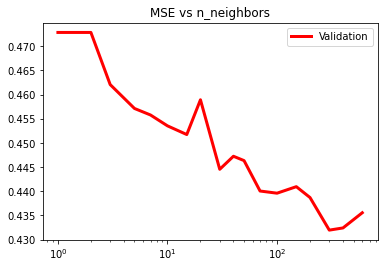

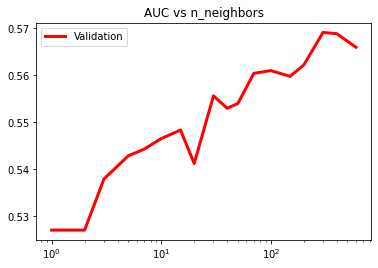

In [145]:
fig, ax = plt.subplots(1,1)


ax.semilogx(all_n_neighbors, n_neighbors_validation_mse, "r-", lw=3, label = "Validation")

plt.legend()
plt.title("MSE vs n_neighbors")
plt.show()


fig, ax = plt.subplots(1,1)


ax.semilogx(all_n_neighbors, n_neighbors_validation_auc, "r-", lw=3, label = "Validation")

plt.legend()
plt.title("AUC vs n_neighbors")
plt.show()
    

n_nieghbors = around 300-400 looks good according to these graphs. Again this is using Standard Scaling and fitting/predicting on only cat features!

## Best KNN Classifier

In [166]:
sklearn_knn = KNeighborsClassifier(n_neighbors=410, weights='distance')
sklearn_knn.fit(Xtr_scaled, Ytr)

Yva_hat = sklearn_knn.predict(Xva_scaled)

print(f"auc: {roc_auc_score(Yva, Yva_hat)} | S mse: {mean_squared_error(Yva, Yva_hat)}")

auc: 0.5719717866821525 | S mse: 0.42927705433318364
